# Marge d'une variable

In [2]:
import numpy as np

variance_req = 5.1**2
nb_modalites = [2, 7.2**2 / 5.1**2]
var_estim = [modalites * variance_req for modalites in nb_modalites]

def poids_et_variance_min(variances: list[float]) -> tuple[np.ndarray, float]:
    """
    Calcule les poids optimaux et la variance minimale d'un estimateur composite
    basé sur n estimateurs non biaisés et indépendants.

    Args:
        variances (list of float): Variances des estimateurs (sigma_i^2)

    Returns:
        - np.ndarray: Poids optimaux (somme à 1)
        - float: Variance minimale de l'estimateur composite
    """
    inv_vars = 1 / np.array(variances)
    poids = inv_vars / inv_vars.sum()
    var_min = 1 / inv_vars.sum()
    return poids, var_min

poids, variance_min = poids_et_variance_min(var_estim)

print("Poids optimaux :", poids)
print("Ecart type minimale :", np.sqrt(variance_min))
print("Ecart type du meilleur estimateur non composite :", np.sqrt(min(var_estim)))

Poids optimaux : [0.49913345 0.50086655]
Ecart type minimale : 5.095578672770995
Ecart type du meilleur estimateur non composite : 7.2


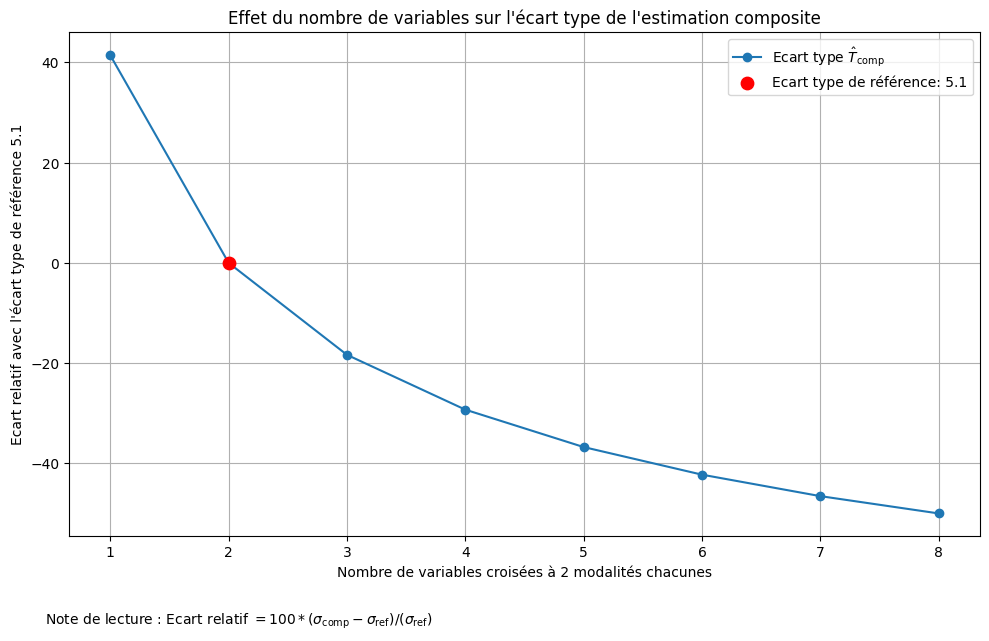

In [60]:
import numpy as np
import matplotlib.pyplot as plt

def poids_et_variance_min(variances: list[float]) -> tuple[np.ndarray, float]:
    inv_vars = 1 / np.array(variances)
    poids = inv_vars / inv_vars.sum()
    var_min = 1 / inv_vars.sum()
    return poids, var_min

def evol_relative(var, var_ref):
    return 100 * (np.sqrt(var) - np.sqrt(var_ref))/np.sqrt(var_ref)

# Paramètres globaux
variance_req = 5.1**2
nb_modalite = 2
max_nb_variables = 8

# Stockage des résultats
x_vals = np.arange(1, max_nb_variables + 1)
list_evolution_relative = []

var_ref = nb_modalite * variance_req

for nb_variables in x_vals:
    var_estim = nb_variables * [nb_modalite * variance_req]
    poids, var_min = poids_et_variance_min(var_estim)
    list_evolution_relative.append(evol_relative(var_min, variance_req))


# Tracé du graphique
plt.figure(figsize=(10, 6))
plt.plot(x_vals, list_evolution_relative, label=r"Ecart type $\hat{T}_{\text{comp}}$", marker="o")
plt.scatter(2, 0, color='red', s=80, zorder=2,label=f"Ecart type de référence: {np.sqrt(variance_req)}")
plt.xlabel(f"Nombre de variables croisées à {nb_modalite} modalités chacunes")
plt.ylabel(f"Ecart relatif avec l'écart type de référence {np.sqrt(variance_req)}")
plt.title("Effet du nombre de variables sur l'écart type de l'estimation composite")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.figtext(
    0.05, -0.05,  # Position (x, y) en coordonnées relatives à la figure (centré en bas)
    r"Note de lecture : Ecart relatif $= 100 * (\sigma_{\text{comp}} - \sigma_{\text{ref}}) / (\sigma_{\text{ref}})$",
    fontsize=10
)
plt.show()

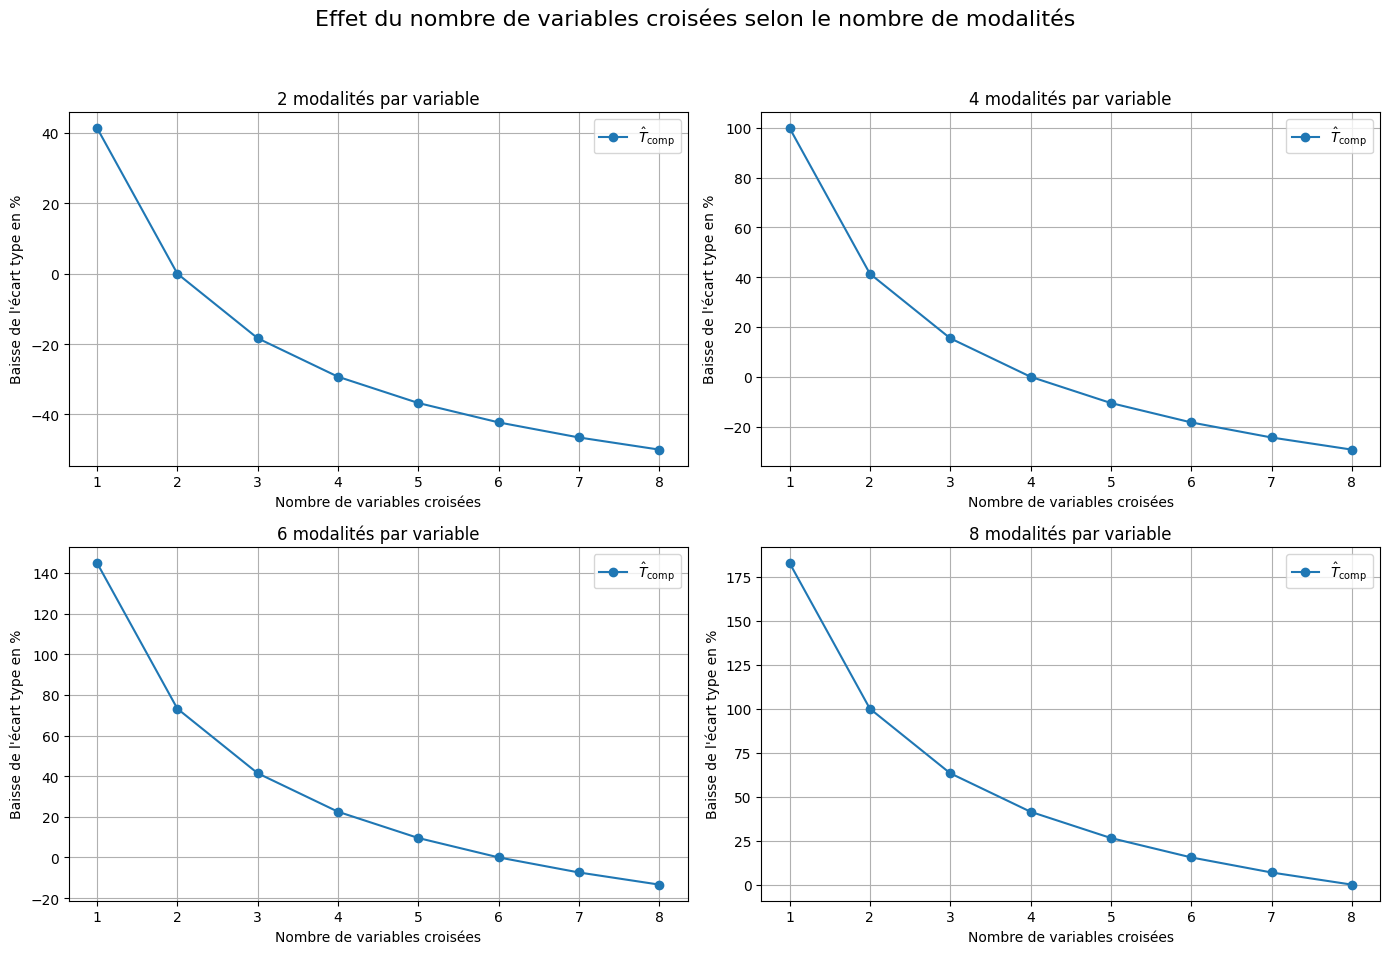

In [32]:
import numpy as np
import matplotlib.pyplot as plt

def poids_et_variance_min(variances: list[float]) -> tuple[np.ndarray, float]:
    inv_vars = 1 / np.array(variances)
    poids = inv_vars / inv_vars.sum()
    var_min = 1 / inv_vars.sum()
    return poids, var_min

def evol_relative(var, var_ref):
    return 100 * (np.sqrt(var) - np.sqrt(var_ref)) / np.sqrt(var_ref)

# Paramètres globaux
variance_req = 5.1**2
max_nb_variables = 8
modalites_list = [2, 4, 6, 8]

# Création des subplots
fig, axs = plt.subplots(2, 2, figsize=(14, 10))
axs = axs.flatten()

for idx, nb_modalite in enumerate(modalites_list):
    x_vals = np.arange(1, max_nb_variables + 1)
    list_evolution_relative = []

    var_ref = nb_modalite * variance_req

    for nb_variables in x_vals:
        var_estim = nb_variables * [nb_modalite * variance_req]
        poids, var_min = poids_et_variance_min(var_estim)
        list_evolution_relative.append(evol_relative(var_min, variance_req))

    # Tracé sur le subplot correspondant
    ax = axs[idx]
    ax.plot(x_vals, list_evolution_relative, label=r"$\hat{T}_{\text{comp}}$", marker="o")

    ax.set_xlabel("Nombre de variables croisées")
    ax.set_ylabel("Baisse de l'écart type en %")
    ax.set_title(f"{nb_modalite} modalités par variable")
    ax.legend()
    ax.grid(True)

# Mise en page globale
plt.suptitle("Effet du nombre de variables croisées selon le nombre de modalités", fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


In [5]:
import numpy as np
import itertools
from matplotlib.colors import ListedColormap, BoundaryNorm

# Paramètres globaux
variance_req = 5.1**2
min_modalite = 2
max_modalite = 8
max_nb_variables = 8

# Stockage
x_modalites = []
ecart_types_composite = []
nb_var_cat = []

# Compteur pour les proportions par classe
nb_classes = 8
nb_total_par_classe = np.zeros(nb_classes)
nb_meilleures_par_classe = np.zeros(nb_classes)

def classer_nb_var(n):
    return min(n - 1, nb_classes - 1)

def poids_et_variance_min(variances):
    inv_vars = 1 / np.array(variances)
    poids = inv_vars / inv_vars.sum()
    var_min = 1 / inv_vars.sum()
    return poids, var_min

for nb_variables in range(1, max_nb_variables + 1):
    cat = classer_nb_var(nb_variables)

    # Génère toutes les combinaisons possibles de modalités sans ordre
    combinaisons = itertools.combinations_with_replacement(range(min_modalite, max_modalite + 1), nb_variables)

    for nb_modalites in combinaisons:
        total_modalites = sum(nb_modalites)
        var_estim = np.array(nb_modalites) * variance_req

        poids, var_min = poids_et_variance_min(var_estim)
        std_min = np.sqrt(var_min)

        x_modalites.append(total_modalites)
        ecart_types_composite.append(std_min)
        nb_var_cat.append(cat)

        nb_total_par_classe[cat] += 1
        if var_min <= variance_req:
            nb_meilleures_par_classe[cat] += 1

# Calcul des proportions finales
proportions = nb_meilleures_par_classe / nb_total_par_classe
print("Proportions de variances composites < variance_req par classe :")
for i, prop in enumerate(proportions):
    print(f"Classe {i} : {prop:.2%}")

print(nb_total_par_classe)

Proportions de variances composites < variance_req par classe :
Classe 0 : 0.00%
Classe 1 : 3.57%
Classe 2 : 14.29%
Classe 3 : 41.90%
Classe 4 : 71.86%
Classe 5 : 91.13%
Classe 6 : 98.78%
Classe 7 : 100.00%
[   7.   28.   84.  210.  462.  924. 1716. 3003.]


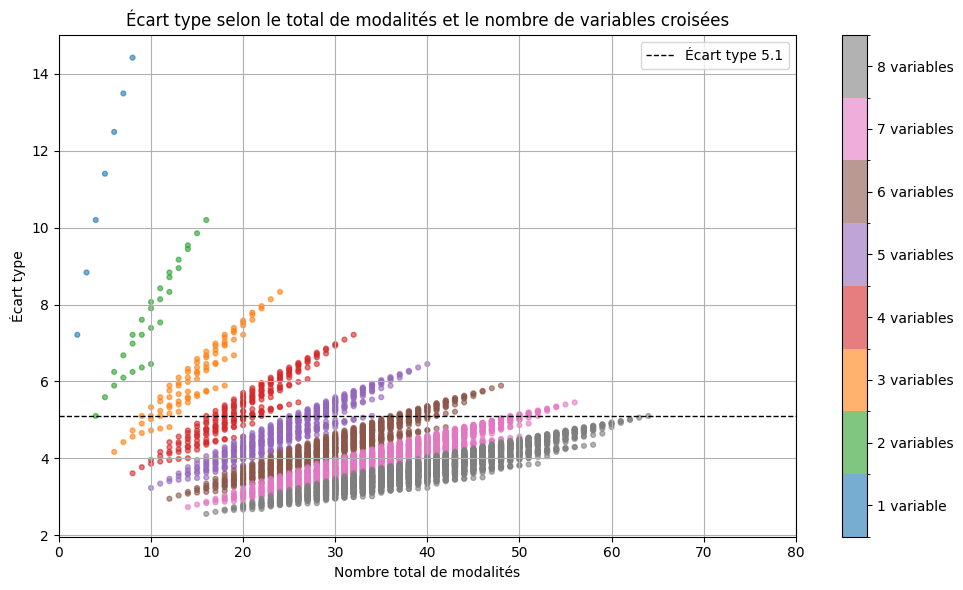

In [6]:
# Couleurs et légendes
couleurs = ["#1f77b4", "#2ca02c", "#ff7f0e", "#d62728", "#9467bd", "#8c564b", "#e377c2", "#7f7f7f"]
labels = ["1 variable", "2 variables", "3 variables", "4 variables", "5 variables", "6 variables", "7 variables", "8 variables"]
cmap = ListedColormap(couleurs)
norm = BoundaryNorm(boundaries=np.arange(9) - 0.5, ncolors=len(labels))

# Tracé
plt.figure(figsize=(10, 6))
sc = plt.scatter(x_modalites, ecart_types_composite, c=nb_var_cat, cmap=cmap, norm=norm, s=12, alpha=0.6)
plt.axhline(y=np.sqrt(variance_req), color='black', linestyle='--', linewidth=1, label="Écart type 5.1")

cbar = plt.colorbar(sc, ticks=np.arange(len(labels)))
cbar.ax.set_yticklabels(labels)

plt.xlabel("Nombre total de modalités")
plt.ylabel("Écart type")
plt.title("Écart type selon le total de modalités et le nombre de variables croisées")
plt.xlim(0, 80)
plt.grid(True)
plt.legend(loc="upper right")
plt.tight_layout()
plt.show()

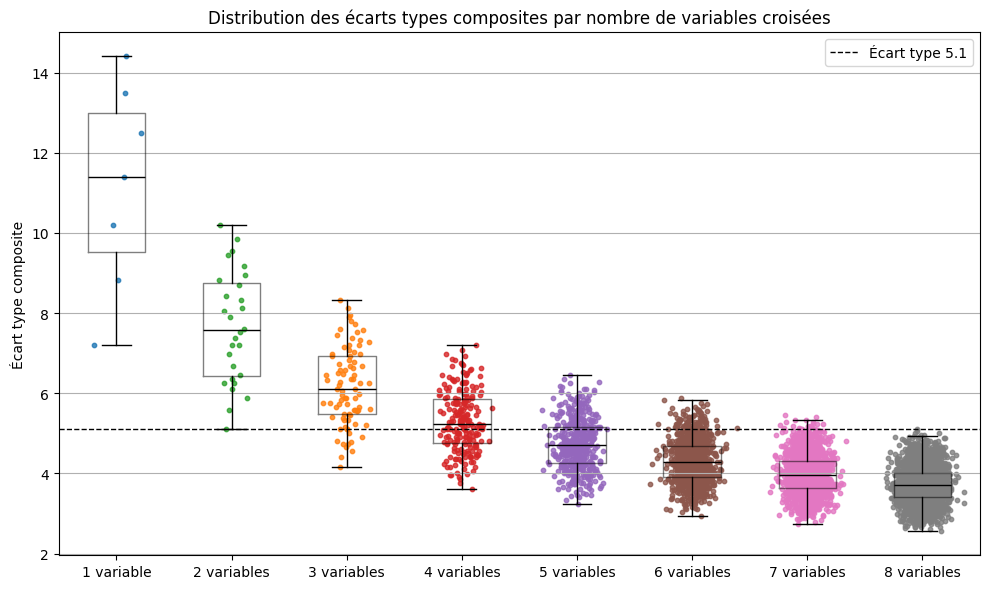

In [7]:
import matplotlib.pyplot as plt
import numpy as np

# Couleurs et étiquettes
couleurs = ["#1f77b4", "#2ca02c", "#ff7f0e", "#d62728", "#9467bd", "#8c564b", "#e377c2", "#7f7f7f"]
labels = ["1 variable", "2 variables", "3 variables", "4 variables", "5 variables", "6 variables", "7 variables", "8 variables"]

# Organisation des données en fonction des classes
data_par_classe = [[] for _ in range(len(labels))]
for val, cat in zip(ecart_types_composite, nb_var_cat):
    data_par_classe[cat].append(val)

# Tracé boxplot avec médiane noire et transparence
plt.figure(figsize=(10, 6))
box = plt.boxplot(
    data_par_classe,
    tick_labels=labels,
    showfliers=False,
    medianprops=dict(color="black")  # médiane en noir
)

for patch in box['boxes']:
    patch.set(alpha = 0.5)


# Ajout des points avec jitter
for i, (classe_data, color) in enumerate(zip(data_par_classe, couleurs), start=1):
    x_jitter = np.random.normal(loc=i, scale=0.1, size=len(classe_data))
    plt.scatter(x_jitter, classe_data, color=color, alpha=0.8, s=10)

# Ligne de référence
plt.axhline(y=np.sqrt(variance_req), color='black', linestyle='--', linewidth=1, label="Écart type 5.1")

plt.ylabel("Écart type composite")
plt.title("Distribution des écarts types composites par nombre de variables croisées")
plt.grid(axis="y")
plt.legend(loc="upper right")
plt.tight_layout()
plt.show()

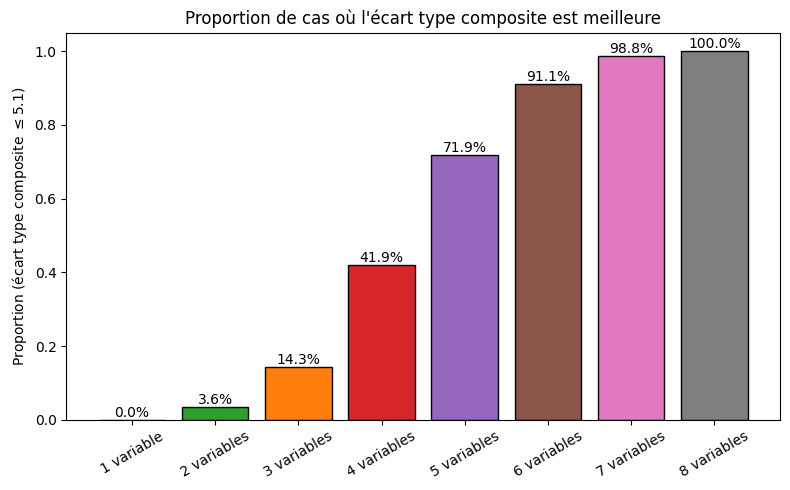

In [82]:
plt.figure(figsize=(8, 5))
bars = plt.bar(labels, proportions, color=couleurs, edgecolor="black")  # contour noir

# Ajouter les pourcentages au-dessus des barres
for bar, prop in zip(bars, proportions):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f"{prop:.1%}", ha='center', va='bottom', fontsize=10)

plt.ylabel(r"Proportion (écart type composite $\leq 5.1$)")
plt.title("Proportion de cas où l'écart type composite est meilleure")
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()

## Cas d'un croisement 2/2

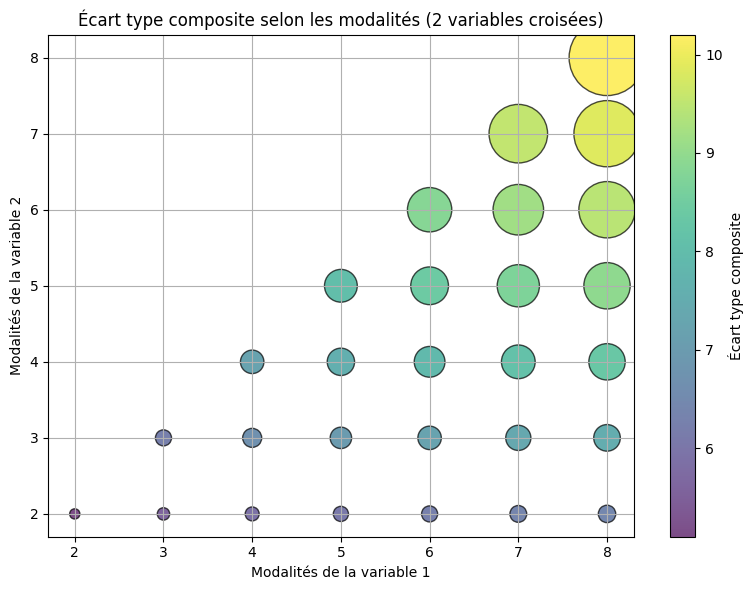

In [8]:
import numpy as np
import itertools
import matplotlib.pyplot as plt

# Paramètres
variance_req = 5.1**2
min_modalite = 2
max_modalite = 8

# Stockage pour le cas à 2 variables
x_modalite_var1 = []
y_modalite_var2 = []
std_min_list = []

def poids_et_variance_min(variances):
    inv_vars = 1 / np.array(variances)
    poids = inv_vars / inv_vars.sum()
    var_min = 1 / inv_vars.sum()
    return poids, var_min

# On ne traite que les cas avec 2 variables
nb_variables = 2
combinaisons = itertools.combinations_with_replacement(
    range(min_modalite, max_modalite + 1), nb_variables
)

for nb_modalites in combinaisons:
    var_estim = np.array(nb_modalites) * variance_req
    poids, var_min = poids_et_variance_min(var_estim)
    std_min = np.sqrt(var_min)

    x_modalite_var1.append(nb_modalites[1])
    y_modalite_var2.append(nb_modalites[0])
    std_min_list.append(std_min)

# Graphique : modalité 1 en x, modalité 2 en y, taille ~ écart type
plt.figure(figsize=(8, 6))
sizes =  np.exp(8 * (np.array(std_min_list) / max(std_min_list)))  # taille relative à l'écart type

sc = plt.scatter(x_modalite_var1, y_modalite_var2, s=sizes, c=std_min_list, cmap="viridis", alpha=0.7, edgecolors="black")
plt.colorbar(sc, label="Écart type composite")
plt.xlabel("Modalités de la variable 1")
plt.ylabel("Modalités de la variable 2")
plt.title("Écart type composite selon les modalités (2 variables croisées)")
plt.grid(True)
plt.tight_layout()
plt.show()


# Marge globale

In [84]:
from itertools import combinations_with_replacement, combinations

# Paramètres
valeurs = range(2, 9)  # m_i entre 2 et 8
n = 4  # nombre de variables (modifiable)
produits_paires = []

# Générer toutes les combinaisons possibles sans ordre
combinaisons_n = combinations_with_replacement(valeurs, n)

# Pour chaque combinaison, calculer les produits deux à deux
for comb in combinaisons_n:
    produits = [a * b for a, b in combinations(comb, 2)]
    produits_paires.append(produits)

# Exemple : afficher les 5 premiers vecteurs de produits
for p in produits_paires[:5]:
    print(p)
print(len(produits_paires))

[4, 4, 4, 4, 4, 4]
[4, 4, 6, 4, 6, 6]
[4, 4, 8, 4, 8, 8]
[4, 4, 10, 4, 10, 10]
[4, 4, 12, 4, 12, 12]
210


In [9]:
from itertools import combinations_with_replacement, combinations
import numpy as np
from matplotlib.colors import ListedColormap, BoundaryNorm

# Paramètres
variance_req = 5.1**2
min_modalite = 2
max_modalite = 8
max_nb_variables = 8

# Stockage
ecart_types_composite = []
nb_var_cat = []

# Compteur pour les proportions par classe
nb_classes = max_nb_variables - 1
nb_total_par_classe = np.zeros(nb_classes)
nb_meilleures_par_classe = np.zeros(nb_classes)

def classer_nb_var(n):
    return min(n - 1, nb_classes)

for nb_variables in range(2, max_nb_variables + 1):
    cat = classer_nb_var(nb_variables)

    # Génère toutes les combinaisons possibles de modalités sans ordre
    combinaisons = combinations_with_replacement(range(min_modalite, max_modalite + 1), nb_variables)

    for comb in combinaisons:

        produits = [a * b for a, b in combinations(comb, 2)]
        var_estim = np.array(produits) * variance_req

        poids, var_min = poids_et_variance_min(var_estim)
        std_min = np.sqrt(var_min)

        ecart_types_composite.append(std_min)
        nb_var_cat.append(cat)

        nb_total_par_classe[cat-1] += 1
        if var_min <= variance_req:
            nb_meilleures_par_classe[cat-1] += 1

# Calcul des proportions finales
proportions = nb_meilleures_par_classe / nb_total_par_classe
print("Proportions de variances composites < variance_req par classe :")
for i, prop in enumerate(proportions):
    print(f"Classe {i+1} : {prop:.2%}")

print(nb_total_par_classe)

Proportions de variances composites < variance_req par classe :
Classe 1 : 0.00%
Classe 2 : 0.00%
Classe 3 : 2.38%
Classe 4 : 12.99%
Classe 5 : 34.63%
Classe 6 : 60.26%
Classe 7 : 81.49%
[  28.   84.  210.  462.  924. 1716. 3003.]


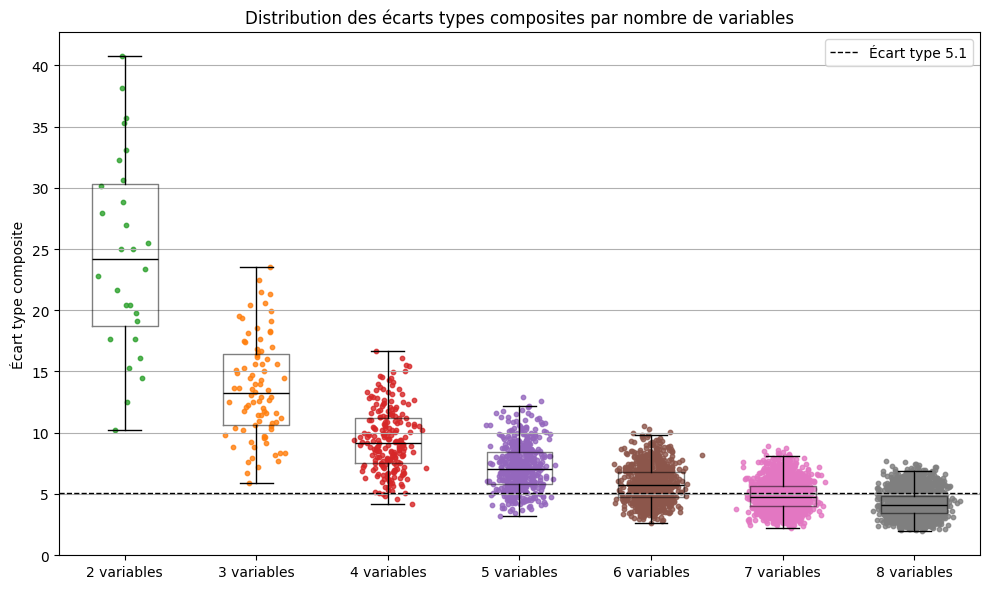

In [11]:
import matplotlib.pyplot as plt
import numpy as np

# Couleurs et étiquettes
couleurs = ["#2ca02c", "#ff7f0e", "#d62728", "#9467bd", "#8c564b", "#e377c2", "#7f7f7f"]
labels = ["2 variables", "3 variables", "4 variables", "5 variables", "6 variables", "7 variables", "8 variables"]

# Organisation des données en fonction des classes
data_par_classe = [[] for _ in range(len(labels))]
for val, cat in zip(ecart_types_composite, nb_var_cat):
    data_par_classe[cat-1].append(val)

# Tracé boxplot avec médiane noire et transparence
plt.figure(figsize=(10, 6))
box = plt.boxplot(
    data_par_classe,
    tick_labels=labels,
    showfliers=False,
    medianprops=dict(color="black")  # médiane en noir
)

for patch in box['boxes']:
    patch.set(alpha = 0.5)


# Ajout des points avec jitter
for i, (classe_data, color) in enumerate(zip(data_par_classe, couleurs), start=1):
    x_jitter = np.random.normal(loc=i, scale=0.1, size=len(classe_data))
    plt.scatter(x_jitter, classe_data, color=color, alpha=0.8, s=10)

# Ligne de référence
plt.axhline(y=np.sqrt(variance_req), color='black', linestyle='--', linewidth=1, label="Écart type 5.1")

plt.ylabel("Écart type composite")
plt.title("Distribution des écarts types composites par nombre de variables")
plt.grid(axis="y")
plt.legend(loc="upper right")
plt.tight_layout()
plt.show()

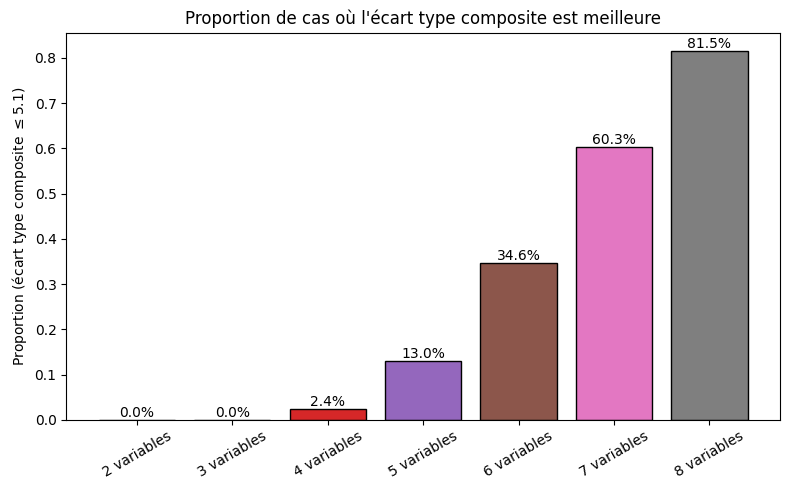

In [87]:
plt.figure(figsize=(8, 5))
bars = plt.bar(labels, proportions, color=couleurs, edgecolor="black")  # contour noir

# Ajouter les pourcentages au-dessus des barres
for bar, prop in zip(bars, proportions):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f"{prop:.1%}", ha='center', va='bottom', fontsize=10)

plt.ylabel(r"Proportion (écart type composite $\leq 5.1$)")
plt.title("Proportion de cas où l'écart type composite est meilleure")
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()

# Trouver le sigma requete pour atteindre une target

In [76]:
import numpy as np
import pandas as pd
import itertools

# Paramètres globaux
variance_req = 5.1**2
min_modalite = 2
max_modalite = 8
variance_target = 5.1**2
nb_variables = 2

# Fonction utilitaire
def poids_et_variance_min(variances):
    inv_vars = 1 / np.array(variances)
    poids = inv_vars / inv_vars.sum()
    var_min = 1 / inv_vars.sum()
    return poids, var_min

# Construction du DataFrame
rows = []

combinaisons = itertools.combinations_with_replacement(range(min_modalite, max_modalite + 1), nb_variables)

for nb_modalites in combinaisons:
    var_estim = np.array(nb_modalites) * variance_req

    _, var_min = poids_et_variance_min(var_estim)
    std_min = np.sqrt(var_min)

    # Calcul de l'écart type de requête
    std_requete = np.sqrt(1 / ((1 / variance_target) - (1 / var_min)))

    rows.append({
        "modalites": nb_modalites,
        "ecart_type_composite": std_min,
        "ecart_type_requete": std_requete
    })

df = pd.DataFrame(rows)
print(df)

   modalites  ecart_type_composite  ecart_type_requete
0     (2, 2)              5.100000                 inf
1     (2, 3)              5.586770           12.492398
2     (2, 4)              5.888973           10.200000
3     (2, 5)              6.095666            9.311283
4     (2, 6)              6.246199            8.833459
5     (2, 7)              6.360818            8.533932
6     (2, 8)              6.451046            8.328265
7     (3, 3)              6.246199            8.833459
8     (3, 4)              6.677467            7.900886
9     (3, 5)              6.983463            7.465636
10    (3, 6)              7.212489            7.212489
11    (3, 7)              7.390602            7.046663
12    (3, 8)              7.533199            6.929535
13    (4, 4)              7.212489            7.212489
14    (4, 5)              7.602631            6.876839
15    (4, 6)              7.900886            6.677467
16    (4, 7)              8.136785            6.545227
17    (4, 

/tmp/ipykernel_262791/3916516039.py:31: RuntimeWarning: divide by zero encountered in scalar divide
  std_requete = np.sqrt(1 / ((1 / variance_target) - (1 / var_min)))


# Cas de croisement multiples

## Faire une requête pour chacun des tableaux deux à deux sera toujours meilleure qu' une seule précise correspondant au croisement de toutes les variables

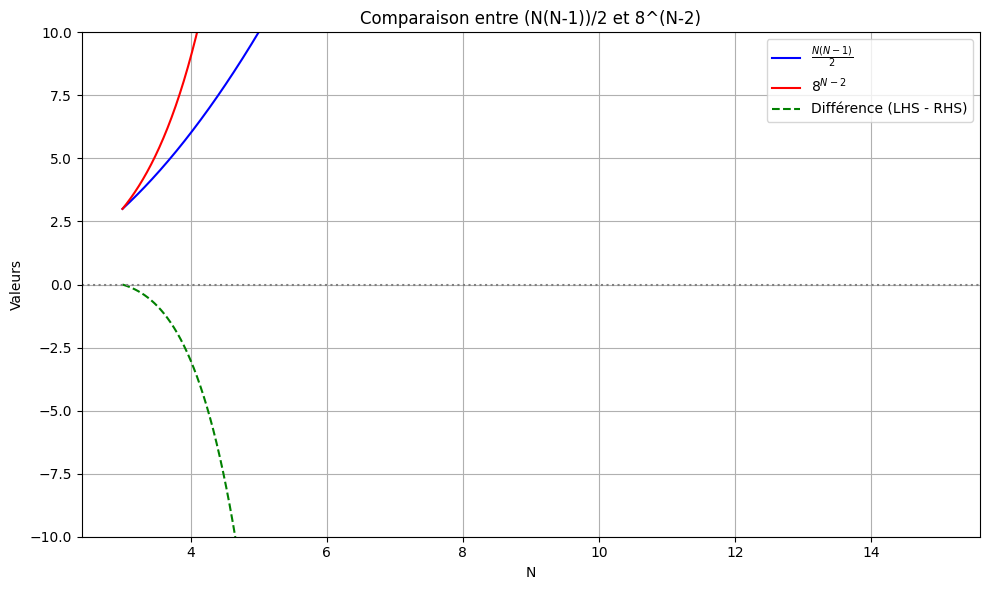

In [19]:
import matplotlib.pyplot as plt
import numpy as np

# Valeurs de N de 1 à 40
m_1 = 3
N_values = np.linspace(3, 15, 1000)
lhs_values = N_values * (N_values - 1) / 2           # (N(N-1))/2
rhs_values = np.power(m_1, N_values - 2)             # 8^(N-2), casté en float pour éviter l'overflow
diff_values = lhs_values - rhs_values                # LHS - RHS

# Tracé des courbes
plt.figure(figsize=(10, 6))
plt.plot(N_values, lhs_values, label=r'$\frac{N(N-1)}{2}$', color='blue')
plt.plot(N_values, rhs_values, label=r'$8^{N-2}$', color='red')
plt.plot(N_values, diff_values, label='Différence (LHS - RHS)', color='green', linestyle='--')

# Ligne horizontale à y=0
plt.axhline(0, color='gray', linestyle=':')

# Mise en forme du graphe
plt.xlabel('N')
plt.ylabel('Valeurs')
plt.title('Comparaison entre (N(N-1))/2 et 8^(N-2)')
plt.legend()
plt.grid(True)
plt.ylim(-10, 10)
plt.tight_layout()

plt.show()


## Mais pour la combinaison des deux ?

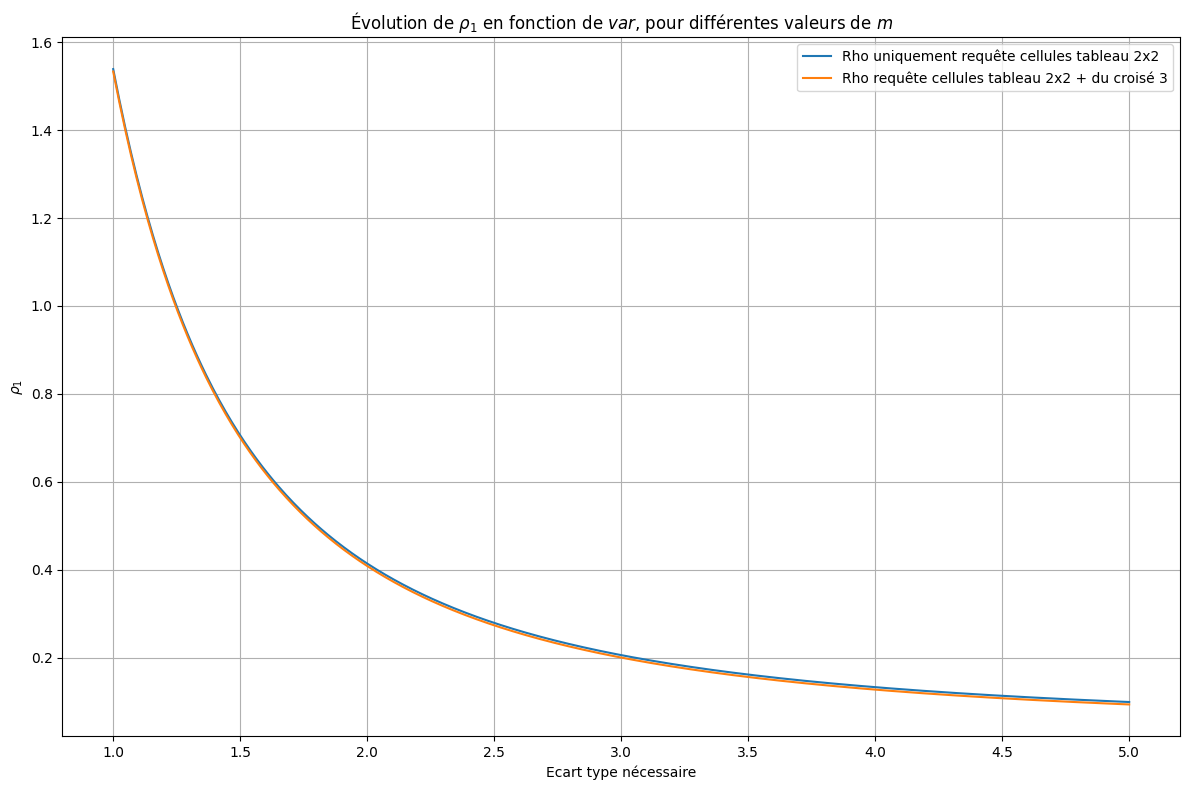

In [90]:
import numpy as np
import matplotlib.pyplot as plt

# Paramètres fixes
m_A = 3
m_B = 2
m_C = 3
var_2v = np.linspace(1, 25, 1000)
var_3v = 15

# Création du graphique
plt.figure(figsize=(12, 8))

def var_opti(var_2v, var_3v, m):
    return (var_2v + m*var_3v) / (2*m* var_2v * var_3v)

rho_2v = var_opti(var_2v, var_3v, m_A) + var_opti(var_2v, var_3v, m_B) + var_opti(var_2v, var_3v, m_C)

rho_3v = 3 / (2 * var_2v) + 1/(2*var_3v)

plt.plot(np.sqrt(var_2v), rho_2v, label=f"Rho uniquement requête cellules tableau 2x2")
plt.plot(np.sqrt(var_2v), rho_3v, label=f"Rho requête cellules tableau 2x2 + du croisé 3")

# Mise en forme du graphique
plt.xlabel("Ecart type nécessaire")
plt.ylabel(r"$\rho_1$")
plt.title(r"Évolution de $\rho_1$ en fonction de $var$, pour différentes valeurs de $m$")
plt.legend()
plt.grid(True)
plt.tight_layout()

plt.show()


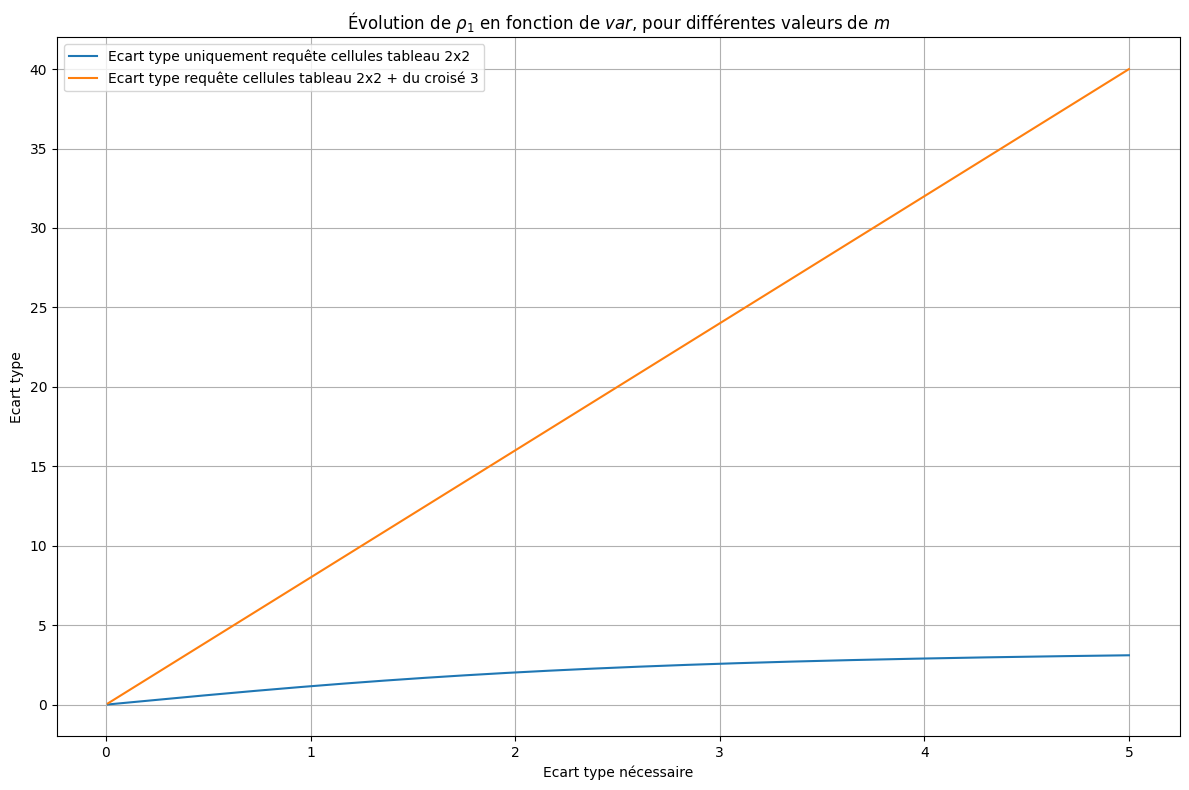

In [95]:
import numpy as np
import matplotlib.pyplot as plt

# Paramètres fixes
m_A = 3
m_B = 3
m_C = 3
var_values = np.linspace(0.0001, 25, 1000)
var_2v = 5.1**2

# Création du graphique
plt.figure(figsize=(12, 8))

def var_opti(var_2v, var_3v, m):
    return (var_2v + m*var_3v) / (2*m* var_2v * var_3v)

var_marge_2v = 1 / (2 *(var_opti(var_2v, var_values, m_A) + var_opti(var_2v, var_values, m_B)))

var_marge_3v = 1 / ( 2/(m**var_2v) + 1/(m**2 * var_values) )

plt.plot(np.sqrt(var_values), np.sqrt(var_marge_2v), label=f"Ecart type uniquement requête cellules tableau 2x2")
plt.plot(np.sqrt(var_values), np.sqrt(var_marge_3v), label=f"Ecart type requête cellules tableau 2x2 + du croisé 3")

# Mise en forme du graphique
plt.xlabel("Ecart type nécessaire")
plt.ylabel("Ecart type")
plt.title(r"Évolution de $\rho_1$ en fonction de $var$, pour différentes valeurs de $m$")
plt.legend()
plt.grid(True)
plt.tight_layout()

plt.show()

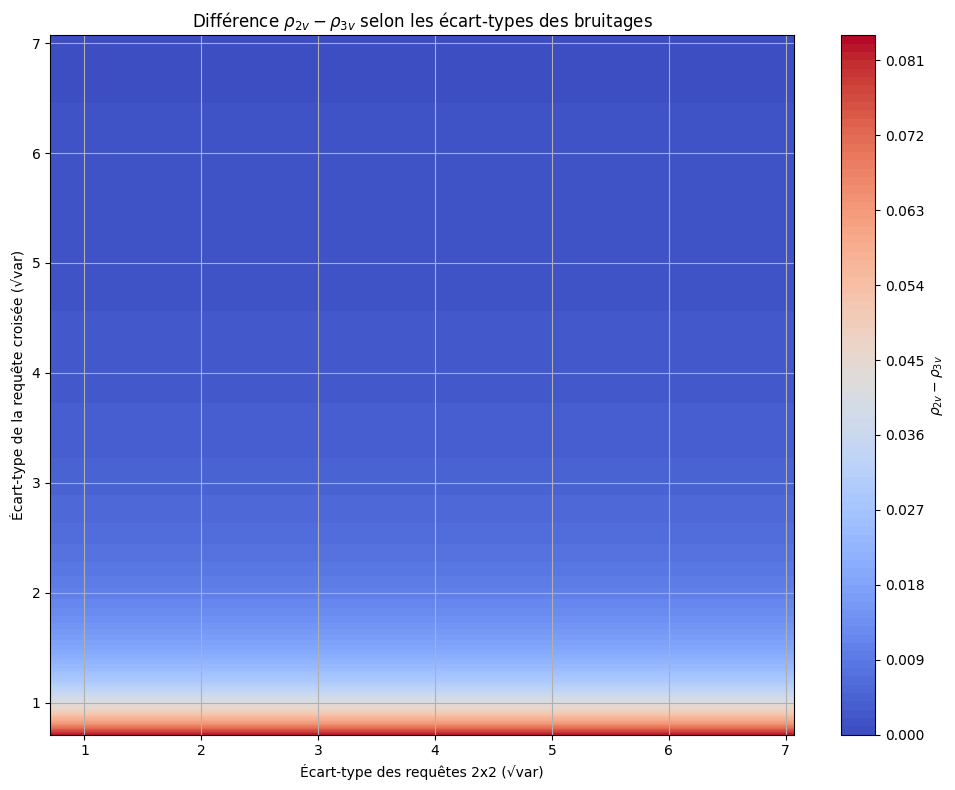

In [22]:
import numpy as np
import matplotlib.pyplot as plt

# Paramètres m fixes
m_A, m_B, m_C = 4, 3, 2

# Création d'une grille 2D de valeurs pour var_2v et var_3v
var_2v = np.linspace(0.5, 50, 300)
var_3v = np.linspace(0.5, 50, 300)
VAR_2V, VAR_3V = np.meshgrid(var_2v, var_3v)

# Fonction de calcul de var_opti
def var_opti(var2, var3, m):
    return (var2 + m * var3) / (2 * m * var2 * var3)

# Calcul des deux rho sur la grille
rho_2v = (
    var_opti(VAR_2V, VAR_3V, m_A) +
    var_opti(VAR_2V, VAR_3V, m_B) +
    var_opti(VAR_2V, VAR_3V, m_C)
)

rho_3v = 3 / (2 * VAR_2V) + 1 / (2 * VAR_3V)

# Optionnel : différence entre les deux stratégies
delta_rho = rho_2v - rho_3v

# Tracé d’un contour plot de la différence
plt.figure(figsize=(10, 8))
contour = plt.contourf(np.sqrt(VAR_2V), np.sqrt(VAR_3V), delta_rho, levels=100, cmap='coolwarm')
cbar = plt.colorbar(contour)
cbar.set_label(r"$\rho_{2v} - \rho_{3v}$")

# Mise en forme du graphique
plt.xlabel("Écart-type des requêtes 2x2 (√var)")
plt.ylabel("Écart-type de la requête croisée (√var)")
plt.title(r"Différence $\rho_{2v} - \rho_{3v}$ selon les écart-types des bruitages")
plt.grid(True)
plt.tight_layout()
plt.show()


En fixant un objectif pour les cellules du tableau et en comparant les deux scénario :
- Je fais simplement 3 requetes pour chacun des tableaux 2x2 à la variance T fixée
- Je fais 3 requetes pour chacun des tableaux 2x2 et une requete sur le tableau croisé 3x3.

L'hypothèse faire ici est que le nombre de modalité de chaque variable est le même.

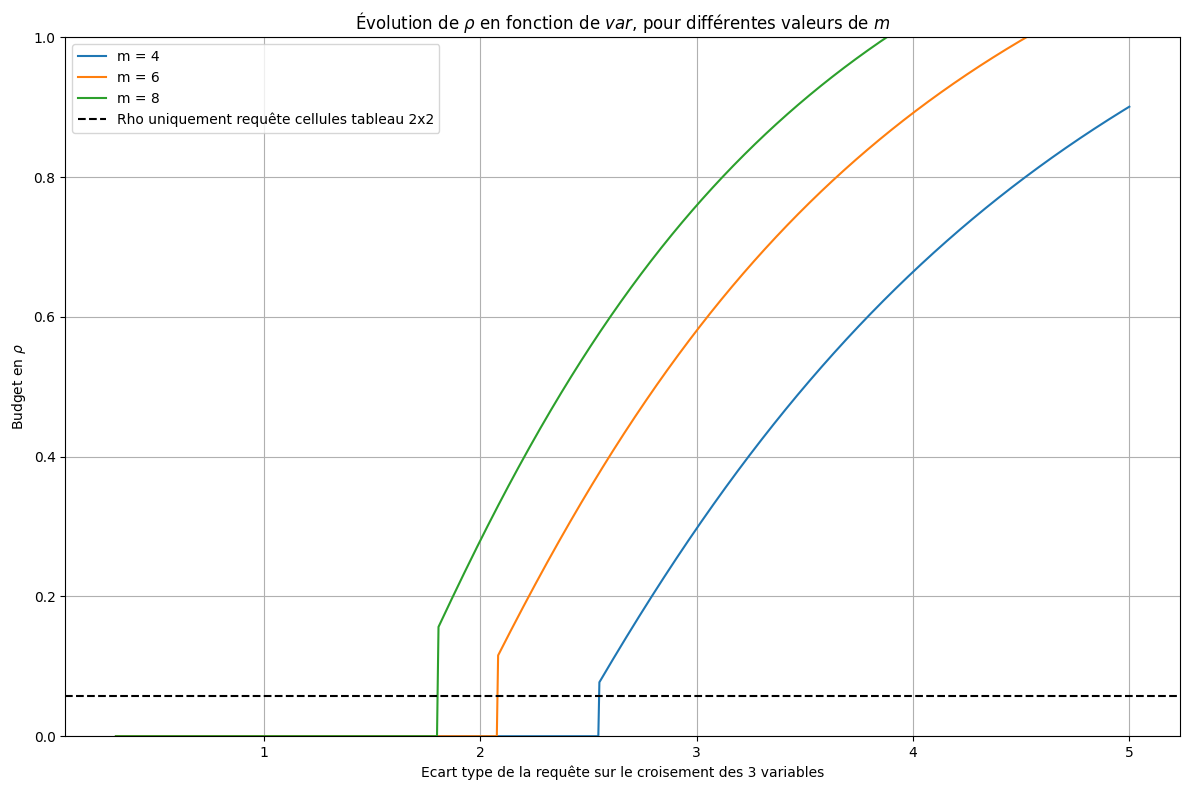

In [79]:
import numpy as np
import matplotlib.pyplot as plt

# Paramètres fixes
var_T = 5.1**2
var_values = np.linspace(0.1, 25, 1000)

# Valeurs de m à tester
m_values = [4, 6, 8]

# Création du graphique
plt.figure(figsize=(12, 8))

for m in m_values:
    var_req = (var_T + m * var_values) / (m * var_values - var_T)
    rho_3v = np.where(
        var_req > 0,
        3 / (2 * var_req) + 1 / (2 * var_values),
        0  # ou 0 selon ce que tu veux
    )
    plt.plot(np.sqrt(var_values), rho_3v, label=f"m = {m}")

# Ligne de référence pour rho_2
rho_2v = 3 / (2 * var_T)
plt.axhline(rho_2v, color='black', linestyle='--', label="Rho uniquement requête cellules tableau 2x2")

# Mise en forme du graphique
plt.xlabel("Ecart type de la requête sur le croisement des 3 variables")
plt.ylabel(r"Budget en $\rho$")
plt.ylim(0, 1)
plt.title(r"Évolution de $\rho$ en fonction de $var$, pour différentes valeurs de $m$")
plt.legend()
plt.grid(True)
plt.tight_layout()

plt.show()

Mise à part cas extrême, à niveau de précision équivalent pour les cases, on dépense forcément plus de budget

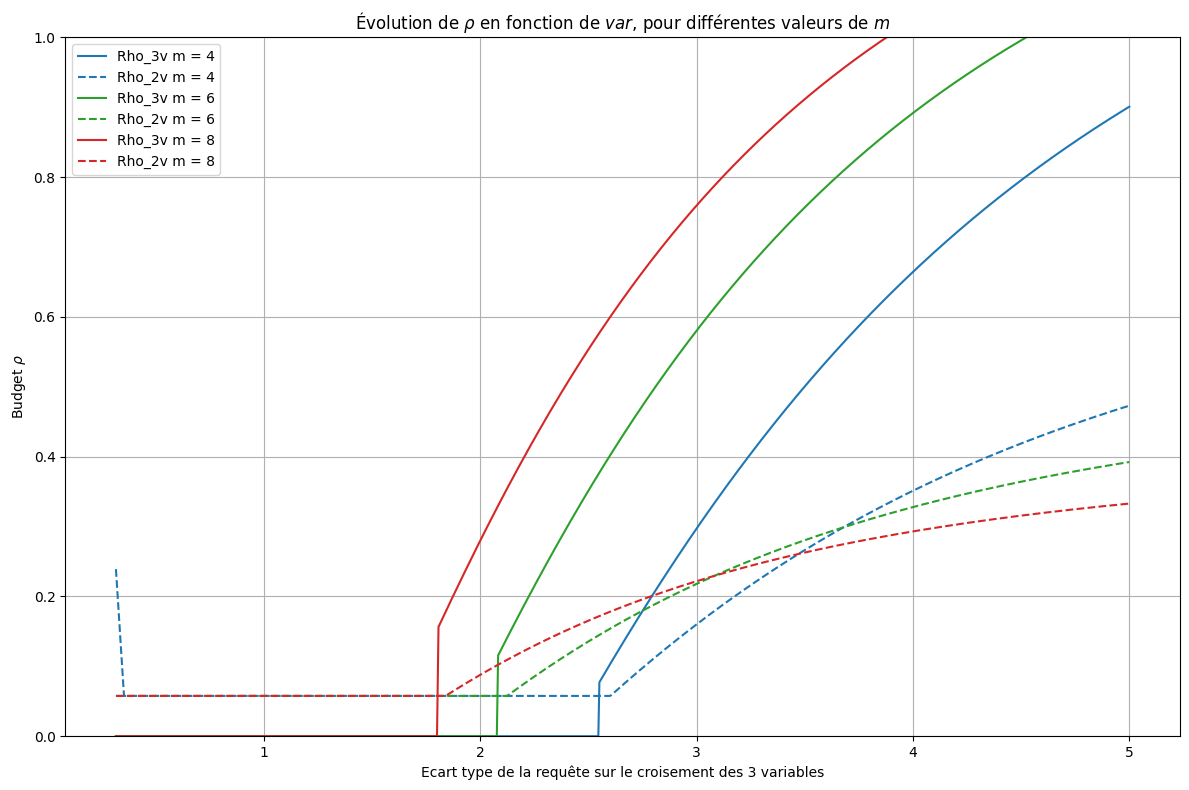

In [39]:
import numpy as np
import matplotlib.pyplot as plt

# Paramètres fixes
var_T = 5.1**2
var_values = np.linspace(0.1, 25, 1000)

# Valeurs de m à tester
m_values = [4, 6, 8]
colors = ["#1f77b4", "#2ca02c", "#d62728"]

# Création du graphique
plt.figure(figsize=(12, 8))

for m, color in zip(m_values, colors):
    var_req = (var_T + m * var_values) / (m * var_values - var_T)
    rho_3v = np.where(
        var_req > 0,
        3 / (2 * var_req) + 1 / (2 * var_values),
        0
    )
    plt.plot(np.sqrt(var_values), rho_3v, label=f"Rho_3v m = {m}", color=color)

    var_req_marge = 1 / ((2 / (m * var_req)) + (1 / (m**2 * var_values)) - (2 / (m * var_T)))
    rho_2v = np.where(
        var_req_marge > 0,
        3 / (2 * var_T) + 3 / (2 * var_req_marge),
        3 / (2 * var_T)
    )
    plt.plot(np.sqrt(var_values), rho_2v, linestyle='--', label=f"Rho_2v m = {m}", color=color)

# Mise en forme du graphique
plt.xlabel("Ecart type de la requête sur le croisement des 3 variables")
plt.ylabel(r"Budget $\rho$")
plt.ylim(0, 1)
plt.title(r"Évolution de $\rho$ en fonction de $var$, pour différentes valeurs de $m$")
plt.legend()
plt.grid(True)
plt.tight_layout()

plt.show()

/tmp/ipykernel_359268/3474524228.py:19: RuntimeWarning: invalid value encountered in sqrt
  plt.plot(np.sqrt(var_values), np.sqrt(var_marge_3v), label=f"écart type 3v m = {m}", color=color)


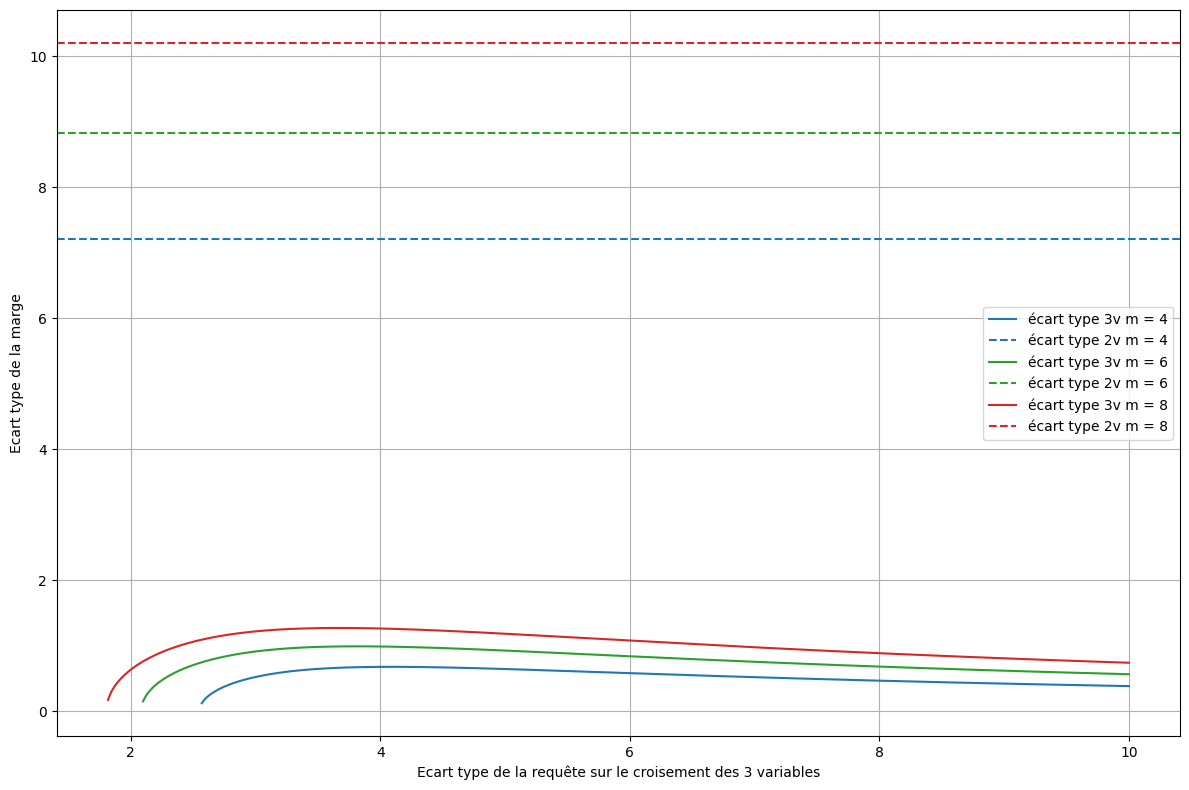

In [33]:
import numpy as np
import matplotlib.pyplot as plt

# Paramètres fixes
var_T = 5.1**2
var_values = np.linspace(0.1, 100, 1000)

# Valeurs de m à tester
m_values = [4, 6, 8]
colors = ["#1f77b4", "#2ca02c", "#d62728"]

# Création du graphique
plt.figure(figsize=(12, 8))

for m, color in zip(m_values, colors):
    var_req = (var_T + m * var_values) / (m * var_values - var_T)
    
    var_marge_3v = 1 / ((2/ m*var_req) + (1/m**2 * var_values))
    plt.plot(np.sqrt(var_values), np.sqrt(var_marge_3v), label=f"écart type 3v m = {m}", color=color)

    var_marge_2v = m* var_T/ 2
    plt.axhline(np.sqrt(var_marge_2v), color=color, linestyle='--', label=f"écart type 2v m = {m}")



# Mise en forme du graphique
plt.xlabel("Ecart type de la requête sur le croisement des 3 variables")
plt.ylabel("Ecart type de la marge")
plt.legend()
plt.grid(True)
plt.tight_layout()

plt.show()

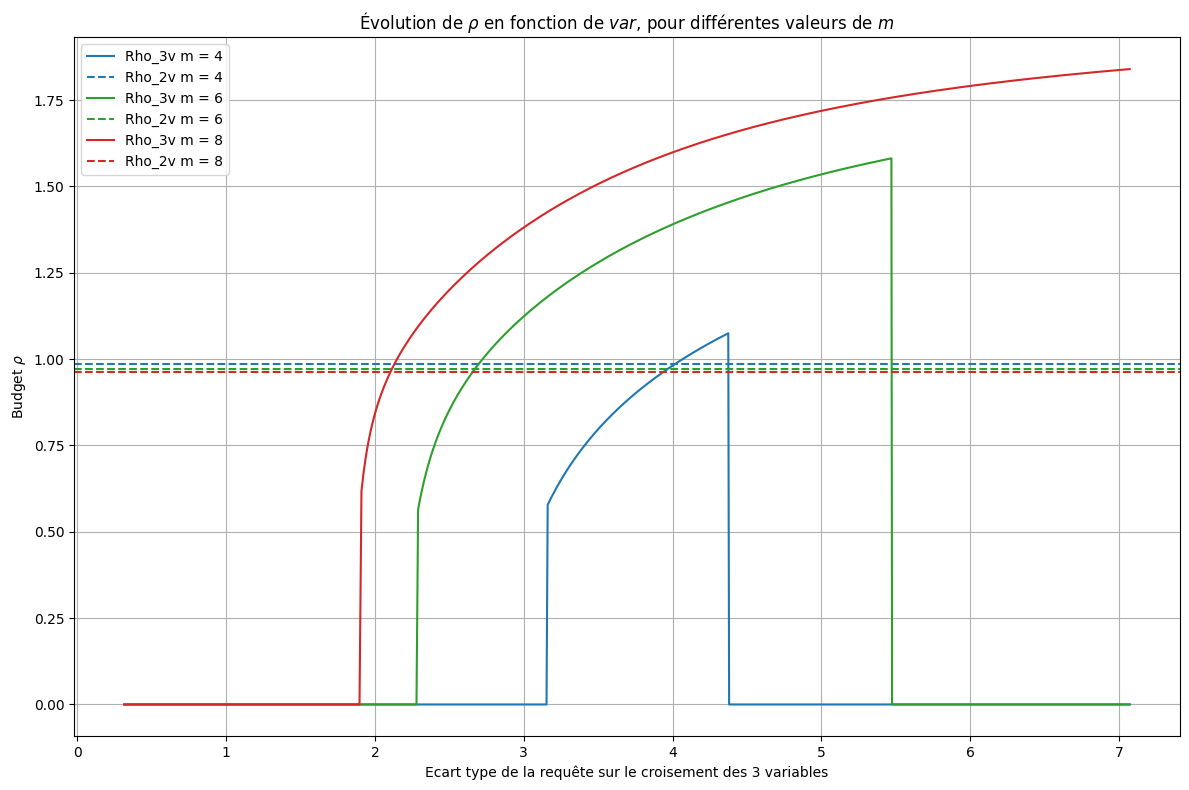

In [74]:
import numpy as np
import matplotlib.pyplot as plt

# Paramètres fixes
var_T = 5.1**2
var_T_2 = 2**2
var_T_3 = 1**2
var_values = np.linspace(0.1, 50, 1000)

# Valeurs de m à tester
m_values = [4, 6, 8]
colors = ["#1f77b4", "#2ca02c", "#d62728"]

# Création du graphique
plt.figure(figsize=(12, 8))

for m, color in zip(m_values, colors):
    var_req_cellule = (var_T + m * var_values) / (m * var_values - var_T)

    var_req_marge_3v = 1 / ( (1 / var_T_2) - (2 / (m * var_req_cellule)) - (1 / (m **2 * var_values)))

    var_req_marge_globale_3v = 1 / ( (1 / var_T_3) - (3 / m**2 * var_req_cellule) - (3 / (m * var_req_marge_3v)) - (1 / (m **3 * var_values)))

    rho_3v = np.where(
        (var_req_cellule > 0) & (var_req_marge_3v > 0) & (var_req_marge_globale_3v > 0),
        3 / (2 * var_req_cellule) + 1 / (2 * var_values) + 3 / (2 * var_req_marge_3v) + 1 / (2 * var_req_marge_globale_3v),
        0
    )

    plt.plot(np.sqrt(var_values), rho_3v, label=f"Rho_3v m = {m}", color=color)

    var_req_marge_2v = 1 / ( (1 / var_T_2) - (2 / (m * var_T)))

    var_req_marge_globale_2v = 1 / ( (1 / var_T_3) - (3 / (m **2 * var_T) - (3 / (m * var_req_marge_2v))))

    rho_2v = np.where(
        (var_req_marge_2v > 0) & (var_req_marge_globale_2v > 0),
        3 / (2 * var_T) + 3 / (2 * var_req_marge_2v) + 1/(2 * var_req_marge_globale_2v),
        0
    )

    plt.axhline(rho_2v, color=color, linestyle='--', label=f"Rho_2v m = {m}")

# Mise en forme du graphique
plt.xlabel("Ecart type de la requête sur le croisement des 3 variables")
plt.ylabel(r"Budget $\rho$")
plt.title(r"Évolution de $\rho$ en fonction de $var$, pour différentes valeurs de $m$")
plt.legend()
plt.grid(True)
plt.tight_layout()

plt.show()

# Application du cas tableau 2 variables

In [41]:
import numpy as np
import math

# Paramètres globaux
variance_cell = 25.5**2
variance_marge_var = 10.2**2
variance_marge_tot = 5.1**2

nb_modalite = [3, 2, 6]
nb_var = len(nb_modalite)

variance_req_marge_var = []

for i in range(nb_var):
    nb_modalite_sans_i = nb_modalite[:i] + nb_modalite[i+1:]
    somme_inverse_var_marge_cell = sum(
        1 / (nb_modalite_sans_i[i] * variance_cell)
        for i in range(len(nb_modalite_sans_i))
    )

    if (1/variance_marge_var - somme_inverse_var_marge_cell) <= 0:
        variance_marge_var_precise = 1 / somme_inverse_var_marge_cell
        scale_bruit = np.sqrt(variance_marge_var - variance_marge_var_precise)
        print(f"Aie on est trop précis pour la marge de la variable {i} ({round(np.sqrt(variance_marge_var_precise),1)}), on a injecté un bruit de {round(scale_bruit,1)}")
        variance_req_marge_var.append(0)

    else:
        variance_req_marge_var.append( 1 / (1/variance_marge_var - somme_inverse_var_marge_cell) )


somme_inverse_var_tot_cell = sum(
    1 / (nb_modalite[i] * nb_modalite[j] * variance_cell)
    for i in range(1, nb_var)
    for j in range(i)
)

somme_inverse_var_tot_marge = sum(
    1 / (nb_modalite[i] * variance_req_marge_var[i]) if variance_req_marge_var[i] > 0 else 0
    for i in range(nb_var)
)

if (1/variance_marge_tot - somme_inverse_var_tot_marge - somme_inverse_var_tot_cell) <= 0:
    variance_marge_tot_precise = 1 / ( somme_inverse_var_tot_marge + somme_inverse_var_tot_cell)
    scale_bruit = np.sqrt(variance_marge_tot - variance_marge_tot_precise)
    print(f"Aie on est trop précis pour la marge tot ({round(np.sqrt(variance_marge_tot_precise),1)}), il faut injecté un bruit de {round(scale_bruit,1)}")
    variance_req_marge_tot = 0

else :
    variance_req_marge_tot = 1 / (1/variance_marge_tot - somme_inverse_var_tot_marge - somme_inverse_var_tot_cell)

# Construction de la chaîne des écarts types des marges
marges_str = ', '.join(
    f"{round(np.sqrt(v), 1)}" for v in variance_req_marge_var
)

rho = (
    math.comb(nb_var, 2) / (2 * variance_cell) + 
    sum(1/(2*variance) if variance > 0 else 0
    for variance in variance_req_marge_var)
)
rho += 1/(2* variance_req_marge_tot) if variance_req_marge_tot >0 else 0

# Impression formatée
print(f"""Dans le cas où je veux que toutes mes estimations soient à écart type ({np.sqrt(variance_cell)}, {np.sqrt(variance_marge_var)}, {np.sqrt(variance_marge_tot)}) :
    - Il faut que je fasse {math.comb(nb_var, 2)} requêtes à écart type {round(np.sqrt(variance_cell),1)} pour les cellules
    - Il faut que je fasse {nb_var} requêtes à écart type {marges_str} pour les marges
    - Enfin une requête à écart type {round(np.sqrt(variance_req_marge_tot),1)} pour le comptage total
    Ce qui fait un budget en rho dépensé de {round(rho,4)}
""")

Dans le cas où je veux que toutes mes estimations soient à écart type (25.5, 10.2, 5.1) :
    - Il faut que je fasse 3 requêtes à écart type 25.5 pour les cellules
    - Il faut que je fasse 3 requêtes à écart type 10.8, 10.6, 11.0 pour les marges
    - Enfin une requête à écart type 5.8 pour le comptage total
    Ce qui fait un budget en rho dépensé de 0.0298



On tente d'aller plus loin en définissant les croisements

In [3]:
import numpy as np
import math

# Paramètres globaux
variance_cell = 25.5**2
variance_marge_var = 10.2**2
variance_marge_tot = 5.1**2

nb_modalite = [4, 2, 7, 2, 3]
nb_var = len(nb_modalite)
croisement_2_2 = [[0, 2], [2, 3], [0, 4]]

variance_req_marge_var = []

for i in range(nb_var): # Pour chaque marge
    somme_inverse_var_marge_cell = 0
    for croisement in croisement_2_2:
        if i in croisement:
            autre_var = croisement[1] if croisement[0] == i else croisement[0]
            somme_inverse_var_marge_cell += 1 / (nb_modalite[autre_var] * variance_cell)

    if (1/variance_marge_var - somme_inverse_var_marge_cell) <= 0:
        variance_marge_var_precise = 1 / somme_inverse_var_marge_cell
        scale_bruit = np.sqrt(variance_marge_var - variance_marge_var_precise)
        print(f"Aie on est trop précis pour la marge de la variable {i} ({round(np.sqrt(variance_marge_var_precise),1)}), on a injecté un bruit de {round(scale_bruit,1)}")
        variance_req_marge_var.append(0)

    else:
        variance_req_marge_var.append( 1 / (1/variance_marge_var - somme_inverse_var_marge_cell) )

somme_inverse_var_tot_cell = 0
somme_inverse_var_tot_marge = 0

for croisement in croisement_2_2:
    somme_inverse_var_tot_cell += 1 / (nb_modalite[croisement[0]] * nb_modalite[croisement[1]] * variance_cell)

somme_inverse_var_tot_marge = sum(
    1 / (nb_modalite[i] * variance_req_marge_var[i]) if variance_req_marge_var[i] > 0 else 0
    for i in range(nb_var)
)

if (1/variance_marge_tot - somme_inverse_var_tot_marge - somme_inverse_var_tot_cell) <= 0:
    variance_marge_tot_precise = 1 / ( somme_inverse_var_tot_marge + somme_inverse_var_tot_cell)
    scale_bruit = np.sqrt(variance_marge_tot - variance_marge_tot_precise)
    print(f"Aie on est trop précis pour la marge tot ({round(np.sqrt(variance_marge_tot_precise),1)}), il faut injecté un bruit de {round(scale_bruit,1)}")
    variance_req_marge_tot = 0

else :
    variance_req_marge_tot = 1 / (1/variance_marge_tot - somme_inverse_var_tot_marge - somme_inverse_var_tot_cell)

# Construction de la chaîne des écarts types des marges
marges_str = ', '.join(
    f"{round(np.sqrt(v), 1)}" for v in variance_req_marge_var
)

rho = (
    len(croisement_2_2) / (2 * variance_cell) + 
    sum(1/(2*variance) if variance > 0 else 0
    for variance in variance_req_marge_var)
)
rho += 1/(2* variance_req_marge_tot) if variance_req_marge_tot > 0 else 0

print(f"""
Dans le cas où je veux que toutes mes estimations, avec les croisements suivants {croisement_2_2} plus les marges, 
soient à écart type ({np.sqrt(variance_cell)}, {np.sqrt(variance_marge_var)}, {np.sqrt(variance_marge_tot)}) :
    - Il faut que je fasse {len(croisement_2_2)} requêtes à écart type {round(np.sqrt(variance_cell),1)} pour les cellules
    - Il faut que je fasse {nb_var} requêtes à écart type {marges_str} pour les marges
    - Enfin une requête à écart type {round(np.sqrt(variance_req_marge_tot),1)} pour le comptage total
    Ce qui fait un budget en rho dépensé de {round(rho,3)}
""")


Dans le cas où je veux que toutes mes estimations, avec les croisements suivants [[0, 2], [2, 3], [0, 4]] plus les marges, 
soient à écart type (25.5, 10.2, 5.1) :
    - Il faut que je fasse 3 requêtes à écart type 25.5 pour les cellules
    - Il faut que je fasse 5 requêtes à écart type 10.6, 10.2, 10.9, 10.3, 10.4 pour les marges
    - Enfin une requête à écart type 6.7 pour le comptage total
    Ce qui fait un budget en rho dépensé de 0.036



On tente les 3 variables

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import combinations

# Paramètres fixes
variance_tricell = 50**2
variance_cell = 25.5**2
variance_marge_var = 10.2**2
variance_marge_tot = 5.1**2

# Valeurs de m à tester

nb_modalite = [3, 2, 2]
nb_var = 3

variance_req_cellule = []
variance_req_marge_var = []

for i in range(3): # Pour chacun des 2 tableaux 2x2

    if (1/variance_cell - (1 / (nb_modalite[i] * variance_tricell))) <= 0:
        variance_cellule_precise = 1 / (nb_modalite[i] * variance_tricell)
        scale_bruit = np.sqrt(variance_cell - variance_cellule_precise)
        print(f"Aie on est trop précis pour les cellules du tableau sans la variable {i} ({round(np.sqrt(variance_cellule_precise),1)}), on a injecté un bruit de {round(scale_bruit,1)}")
        variance_req_cellule.append(0)

    else:
        variance_req_cellule.append( 1 / ( (1 / variance_cell) - (1 / (nb_modalite[i] * variance_tricell))) )

for i in range(nb_var):

    autres_indices = [j for j in range(3) if j != i]
    i_1, i_2 = autres_indices 

    somme_inverse_var_marge_tricell = (
        1 / (nb_modalite[i_1] * nb_modalite[i_2] * variance_tricell)
    )

    somme_inverse_var_marge_cell = 0

    if variance_req_cellule[i_1] > 0:
        somme_inverse_var_marge_cell += 1 / (nb_modalite[i_2] * variance_req_cellule[i_1])

    if variance_req_cellule[i_2] > 0:
        somme_inverse_var_marge_cell += 1 / (nb_modalite[i_1] * variance_req_cellule[i_2])
       

    if (1/variance_marge_var - somme_inverse_var_marge_cell - somme_inverse_var_marge_tricell) <= 0:
        variance_marge_var_precise = 1 / (somme_inverse_var_marge_cell + somme_inverse_var_marge_tricell)
        scale_bruit = np.sqrt(variance_marge_var - variance_marge_var_precise)
        print(f"Aie on est trop précis pour la marge de la variable {i} ({round(np.sqrt(variance_marge_var_precise),1)}), on a injecté un bruit de {round(scale_bruit,1)}")
        variance_req_marge_var.append(0)

    else:
        variance_req_marge_var.append( 1 / (1/variance_marge_var - somme_inverse_var_marge_cell - somme_inverse_var_marge_tricell) )


somme_inverse_var_tot_tricell = (
    1 / (nb_modalite[0] * nb_modalite[1] * nb_modalite[2] * variance_tricell)
)

somme_inverse_var_tot_cell = sum(
    1 / (nb_modalite[i] * nb_modalite[j] * variance_req_cellule[k])
    for i, j in combinations(range(3), 2)
    for k in range(3)
    if k not in (i, j) and variance_req_cellule[k] > 0
)

somme_inverse_var_tot_marge = sum(
    1 / (nb_modalite[i] * variance_req_marge_var[i]) if variance_req_marge_var[i] > 0 else 0
    for i in range(nb_var)
)

if (1/variance_marge_tot - somme_inverse_var_tot_tricell - somme_inverse_var_tot_cell - somme_inverse_var_tot_marge) <= 0:
    variance_marge_tot_precise = 1 / ( somme_inverse_var_tot_marge + somme_inverse_var_tot_cell + somme_inverse_var_tot_tricell)
    scale_bruit = np.sqrt(variance_marge_tot - variance_marge_tot_precise)
    print(f"Aie on est trop précis pour la marge tot ({round(np.sqrt(variance_marge_tot_precise),1)}), il faut injecté un bruit de {round(scale_bruit,1)}")
    variance_req_marge_tot = 0

else :
    variance_req_marge_tot = 1 / (1/variance_marge_tot - somme_inverse_var_tot_marge - somme_inverse_var_tot_cell - somme_inverse_var_tot_tricell)

# Construction de la chaîne des écarts types des marges
cellules_str = ', '.join(
    f"{round(np.sqrt(v), 1)}" for v in variance_req_cellule
)

marges_str = ', '.join(
    f"{round(np.sqrt(v), 1)}" for v in variance_req_marge_var
)

rho = (
    1 / (2 * variance_tricell) + 
    sum(1/(2*variance) if variance > 0 else 0
    for variance in variance_req_cellule) +
    sum(1/(2*variance) if variance > 0 else 0
    for variance in variance_req_marge_var) 
)
rho += 1/(2* variance_req_marge_tot) if variance_req_marge_tot > 0 else 0

# Impression formatée
print(f"""Dans le cas où je veux que toutes mes estimations soient à écart type ({np.sqrt(variance_tricell)}, {np.sqrt(variance_cell)}, {np.sqrt(variance_marge_var)}, {np.sqrt(variance_marge_tot)}) :
    - Il faut que je fasse une requête à écart type {round(np.sqrt(variance_tricell),1)} pour les cellules du tableau à 3 variables
    - Il faut que je fasse {3} requêtes à écart type {cellules_str} pour les cellules des tableaux à 2 variables
    - Il faut que je fasse {nb_var} requêtes à écart type {marges_str} pour les marges
    - Enfin une requête à écart type {round(np.sqrt(variance_req_marge_tot),1)} pour le comptage total
    Ce qui fait un budget en rho dépensé de {round(rho,4)}
""")

Dans le cas où je veux que toutes mes estimations soient à écart type (50.0, 25.5, 10.2, 5.1) :
    - Il faut que je fasse une requête à écart type 50.0 pour les cellules du tableau à 3 variables
    - Il faut que je fasse 3 requêtes à écart type 26.7, 27.3, 27.3 pour les cellules des tableaux à 2 variables
    - Il faut que je fasse 3 requêtes à écart type 11.1, 10.9, 10.9 pour les marges
    - Enfin une requête à écart type 6.1 pour le comptage total
    Ce qui fait un budget en rho dépensé de 0.028



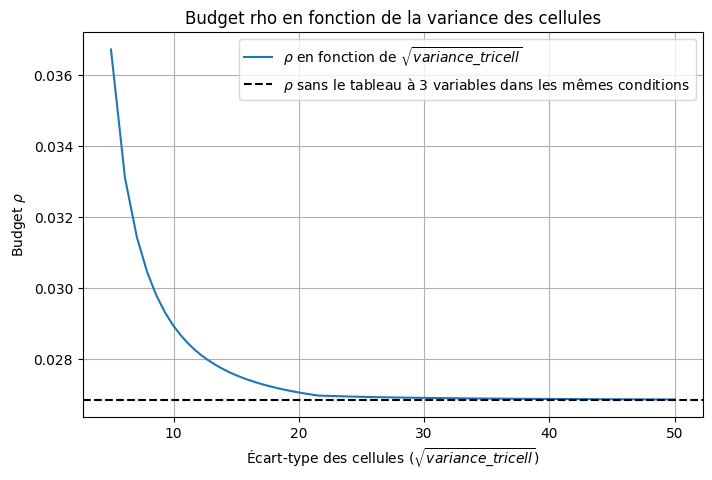

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import combinations
import math

def calcul_rho_deux_deux(variance_cell=25.5**2, variance_marge_var=10.2**2, variance_marge_tot=5.1**2):
    nb_modalite = [2, 2, 2]
    nb_var = len(nb_modalite)

    variance_req_marge_var = []

    for i in range(nb_var):
        nb_modalite_sans_i = nb_modalite[:i] + nb_modalite[i+1:]
        somme_inverse_var_marge_cell = sum(
            1 / (nb_modalite_sans_i[i] * variance_cell)
            for i in range(len(nb_modalite_sans_i))
        )

        if (1/variance_marge_var - somme_inverse_var_marge_cell) <= 0:
            variance_marge_var_precise = 1 / somme_inverse_var_marge_cell
            scale_bruit = np.sqrt(variance_marge_var - variance_marge_var_precise)
            print(f"Aie on est trop précis pour la marge de la variable {i} ({round(np.sqrt(variance_marge_var_precise),1)}), on a injecté un bruit de {round(scale_bruit,1)}")
            variance_req_marge_var.append(0)

        else:
            variance_req_marge_var.append( 1 / (1/variance_marge_var - somme_inverse_var_marge_cell) )


    somme_inverse_var_tot_cell = sum(
        1 / (nb_modalite[i] * nb_modalite[j] * variance_cell)
        for i in range(1, nb_var)
        for j in range(i)
    )

    somme_inverse_var_tot_marge = sum(
        1 / (nb_modalite[i] * variance_req_marge_var[i]) if variance_req_marge_var[i] > 0 else 0
        for i in range(nb_var)
    )

    if (1/variance_marge_tot - somme_inverse_var_tot_marge - somme_inverse_var_tot_cell) <= 0:
        variance_marge_tot_precise = 1 / ( somme_inverse_var_tot_marge + somme_inverse_var_tot_cell)
        scale_bruit = np.sqrt(variance_marge_tot - variance_marge_tot_precise)
        print(f"Aie on est trop précis pour la marge tot ({round(np.sqrt(variance_marge_tot_precise),1)}), il faut injecté un bruit de {round(scale_bruit,1)}")
        variance_req_marge_tot = 0

    else :
        variance_req_marge_tot = 1 / (1/variance_marge_tot - somme_inverse_var_tot_marge - somme_inverse_var_tot_cell)

    # Construction de la chaîne des écarts types des marges
    marges_str = ', '.join(
        f"{round(np.sqrt(v), 1)}" for v in variance_req_marge_var
    )

    rho = (
        math.comb(nb_var, 2) / (2 * variance_cell) + 
        sum(1/(2*variance) if variance > 0 else 0
        for variance in variance_req_marge_var)
    )
    rho += 1/(2* variance_req_marge_tot) if variance_req_marge_tot >0 else 0

    return rho

def calcul_rho_trois_trois(variance_tricell=50**2, variance_cell=25.5**2, variance_marge_var=10.2**2, variance_marge_tot=5.1**2):
    nb_modalite = [2, 2, 2]
    nb_var = 3

    variance_req_cellule = []
    variance_req_marge_var = []

    for i in range(3):
        if (1/variance_cell - (1 / (nb_modalite[i] * variance_tricell))) <= 0:
            variance_cellule_precise = 1 / (nb_modalite[i] * variance_tricell)
            scale_bruit = np.sqrt(variance_cell - variance_cellule_precise)
            # print(f"Aie on est trop précis pour les cellules de la variable {i} ({round(np.sqrt(variance_cellule_precise),1)}), on a injecté un bruit de {round(scale_bruit,1)}")
            variance_req_cellule.append(0)
        else:
            variance_req_cellule.append(1 / ((1 / variance_cell) - (1 / (nb_modalite[i] * variance_tricell))))

    for i in range(nb_var):
        autres_indices = [j for j in range(3) if j != i]
        i_1, i_2 = autres_indices

        somme_inverse_var_marge_tricell = 1 / (nb_modalite[i_1] * nb_modalite[i_2] * variance_tricell)
        somme_inverse_var_marge_cell = 0

        if variance_req_cellule[i_1] > 0:
            somme_inverse_var_marge_cell += 1 / (nb_modalite[i_2] * variance_req_cellule[i_1])
        if variance_req_cellule[i_2] > 0:
            somme_inverse_var_marge_cell += 1 / (nb_modalite[i_1] * variance_req_cellule[i_2])

        if (1 / variance_marge_var - somme_inverse_var_marge_cell - somme_inverse_var_marge_tricell) <= 0:
            variance_req_marge_var.append(0)
        else:
            variance_req_marge_var.append(1 / (1 / variance_marge_var - somme_inverse_var_marge_cell - somme_inverse_var_marge_tricell))

    somme_inverse_var_tot_tricell = 1 / (nb_modalite[0] * nb_modalite[1] * nb_modalite[2] * variance_tricell)

    somme_inverse_var_tot_cell = 0
    for i, j in combinations(range(3), 2):
        k = 3 - i - j  # l'indice manquant parmi 0,1,2
        if variance_req_cellule[k] > 0:
            somme_inverse_var_tot_cell += 1 / (nb_modalite[i] * nb_modalite[j] * variance_req_cellule[k])

    somme_inverse_var_tot_marge = sum(
        1 / (nb_modalite[i] * variance_req_marge_var[i]) if variance_req_marge_var[i] > 0 else 0
        for i in range(nb_var)
    )

    if (1 / variance_marge_tot - somme_inverse_var_tot_tricell - somme_inverse_var_tot_cell - somme_inverse_var_tot_marge) <= 0:
        variance_req_marge_tot = 0
    else:
        variance_req_marge_tot = 1 / (1 / variance_marge_tot - somme_inverse_var_tot_tricell - somme_inverse_var_tot_cell - somme_inverse_var_tot_marge)

    rho = 1 / (2 * variance_tricell)
    rho += sum(1 / (2 * variance) for variance in variance_req_cellule if variance > 0)
    rho += sum(1 / (2 * variance) for variance in variance_req_marge_var if variance > 0)
    if variance_req_marge_tot > 0:
        rho += 1 / (2 * variance_req_marge_tot)

    return rho


# Vecteur de variances_cell à tester (par exemple de 1^2 à 50^2)
variances_tricell_test = np.linspace(5**2, 50**2, 200)

rhos = [calcul_rho_trois_trois(v, variance_cell=30.5**2) for v in variances_tricell_test]

plt.figure(figsize=(8,5))
plt.plot(np.sqrt(variances_tricell_test), rhos, label=r"$\rho$ en fonction de $\sqrt{variance\_tricell}$")
plt.axhline(calcul_rho_deux_deux(variance_cell=30.5**2), color="black", linestyle='--', label=r"$\rho$ sans le tableau à 3 variables dans les mêmes conditions")
plt.xlabel(r"Écart-type des cellules ($\sqrt{variance\_tricell}$)")
plt.ylabel(r"Budget $\rho$")
plt.title("Budget rho en fonction de la variance des cellules")
plt.grid(True)
plt.legend()
plt.show()


Cas des tableaux à 3 variables

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import combinations

# Paramètres fixes
variance_tricell = 50**2
variance_cell = 25.5**2
variance_marge_var = 10.2**2
variance_marge_tot = 5.1**2

# Valeurs de m à tester

nb_modalite = [3, 2, 2, 4, 5]
nb_var = len(nb_modalite)

croisement_3_3 = [[0, 1, 2], [0, 1, 3], [1, 3, 4]]
croisement_2_2 = [[0, 2], [2, 3], [1, 4]]

variance_req_cellule = {}
variance_req_marge_var = []

for croisement_2_a, croisement_2_b in croisement_2_2: # Pour chaque tableau 2x2

    somme_inverse_var_marge_tricell = 0
    for croisement_3 in croisement_3_3:
        if croisement_2_a in croisement_3 and croisement_2_b in croisement_3 :
            autre_var = [x for x in croisement_3 if x != croisement_2_a and x != croisement_2_b][0]
            somme_inverse_var_marge_tricell += 1 / (nb_modalite[autre_var] * variance_tricell)

    if (1/variance_cell - somme_inverse_var_marge_tricell) <= 0:
        variance_cellule_precise = 1 / somme_inverse_var_marge_tricell
        scale_bruit = np.sqrt(variance_cell - variance_cellule_precise)
        print(f"Aie on est trop précis pour les cellules du tableau [{croisement_2_a, croisement_2_b}] ({round(np.sqrt(variance_cellule_precise),1)}), on a injecté un bruit de {round(scale_bruit,1)}")
        variance_req_cellule[croisement_2_a, croisement_2_b] = 0

    else:
        variance_req_cellule[croisement_2_a, croisement_2_b] = 1 / ( (1 / variance_cell) - somme_inverse_var_marge_tricell)

for i in range(nb_var):
    somme_inverse_var_marge_tricell = 0
    for croisement_3 in croisement_3_3:
        if i in croisement_3:

            autres_indices = [j for j in croisement_3 if j != i]
            i_1, i_2 = autres_indices 

            somme_inverse_var_marge_tricell += (
                1 / (nb_modalite[i_1] * nb_modalite[i_2] * variance_tricell)
            )

    somme_inverse_var_marge_cell = 0

    for (croisement_2_a, croisement_2_b), variance in variance_req_cellule.items():
        if i in (croisement_2_a, croisement_2_b) and variance > 0:
            autre_var = croisement_2_a if croisement_2_b == i else croisement_2_b
            somme_inverse_var_marge_cell += 1 / (nb_modalite[autre_var] * variance)       

    if (1/variance_marge_var - somme_inverse_var_marge_cell - somme_inverse_var_marge_tricell) <= 0:
        variance_marge_var_precise = 1 / (somme_inverse_var_marge_cell + somme_inverse_var_marge_tricell)
        scale_bruit = np.sqrt(variance_marge_var - variance_marge_var_precise)
        print(f"Aie on est trop précis pour la marge de la variable {i} ({round(np.sqrt(variance_marge_var_precise),1)}), on a injecté un bruit de {round(scale_bruit,1)}")
        variance_req_marge_var.append(0)

    else:
        variance_req_marge_var.append( 1 / (1/variance_marge_var - somme_inverse_var_marge_cell - somme_inverse_var_marge_tricell) )


somme_inverse_var_tot_tricell = sum(
    1 / (nb_modalite[var_1] * nb_modalite[var_2] * nb_modalite[var_3] * variance_tricell)
    for var_1, var_2, var_3 in croisement_3_3
)

somme_inverse_var_tot_cell = sum(
    1 / (nb_modalite[var_1] * nb_modalite[var_2] * variance_req_cellule[var_1, var_2])
    for var_1, var_2 in croisement_2_2
    if variance_req_cellule[var_1, var_2] >0
)

somme_inverse_var_tot_marge = sum(
    1 / (nb_modalite[i] * variance_req_marge_var[i])
    for i in range(nb_var)
    if variance_req_marge_var[i] > 0
)

if (1/variance_marge_tot - somme_inverse_var_tot_tricell - somme_inverse_var_tot_cell - somme_inverse_var_tot_marge) <= 0:
    variance_marge_tot_precise = 1 / ( somme_inverse_var_tot_marge + somme_inverse_var_tot_cell + somme_inverse_var_tot_tricell)
    scale_bruit = np.sqrt(variance_marge_tot - variance_marge_tot_precise)
    print(f"Aie on est trop précis pour la marge tot ({round(np.sqrt(variance_marge_tot_precise),1)}), il faut injecté un bruit de {round(scale_bruit,1)}")
    variance_req_marge_tot = 0

else :
    variance_req_marge_tot = 1 / (1/variance_marge_tot - somme_inverse_var_tot_marge - somme_inverse_var_tot_cell - somme_inverse_var_tot_tricell)

# Construction de la chaîne des écarts types des marges

cellules_str = ', '.join(
    f"{round(np.sqrt(variance), 1)} croisement [{a},{b}]" for (a, b), variance in variance_req_cellule.items()
)

marges_str = ', '.join(
    f"{round(np.sqrt(v), 1)}" for v in variance_req_marge_var
)

rho = (
    len(croisement_3_3) / (2 * variance_tricell) + 
    sum(1/(2*variance) if variance > 0 else 0
    for variance in variance_req_cellule.values()) +
    sum(1/(2*variance) if variance > 0 else 0
    for variance in variance_req_marge_var) 
)
rho += 1/(2* variance_req_marge_tot) if variance_req_marge_tot > 0 else 0

# Impression formatée
print(f"""Dans le cas où je veux que toutes mes estimations soient à écart type ({np.sqrt(variance_tricell)}, {np.sqrt(variance_cell)}, {np.sqrt(variance_marge_var)}, {np.sqrt(variance_marge_tot)}) :
    - Il faut que je fasse {len(croisement_3_3)} requête à écart type {round(np.sqrt(variance_tricell),1)} pour les cellules des tableaux à 3 variables
    - Il faut que je fasse {len(croisement_2_2)} requêtes à écart type {cellules_str} pour les cellules des tableaux à 2 variables
    - Il faut que je fasse {nb_var} requêtes à écart type {marges_str} pour les marges
    - Enfin une requête à écart type {round(np.sqrt(variance_req_marge_tot),1)} pour le comptage total
    Ce qui fait un budget en rho dépensé de {round(rho,4)}
""")

Dans le cas où je veux que toutes mes estimations soient à écart type (50.0, 25.5, 10.2, 5.1) :
    - Il faut que je fasse 3 requête à écart type 50.0 pour les cellules des tableaux à 3 variables
    - Il faut que je fasse 3 requêtes à écart type 27.3 croisement [0,2], 25.5 croisement [2,3], 26.4 croisement [1,4] pour les cellules des tableaux à 2 variables
    - Il faut que je fasse 5 requêtes à écart type 10.7, 10.4, 10.7, 10.7, 10.6 pour les marges
    - Enfin une requête à écart type 6.7 pour le comptage total
    Ce qui fait un budget en rho dépensé de 0.0359

